# Data generation code

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## Flow Past a Cylinder

Data available at [dmdbook.com/DATA.zip](dmdbook.com/DATA.zip).

In [2]:
# Import vorticity data and frame dimensions.
mat = sio.loadmat("CYLINDER_ALL_LOW_RES.mat")

X = mat["VORTALL"]  # Vorticity data.
nx = mat["nx"][0][0]  # Number of pixels along x-axis.
ny = mat["ny"][0][0]  # Number of pixels along y-axis.
m = X.shape[-1]  # Number of time points.
t = np.arange(m)  # Time data.

print("Flow past a cylinder data loaded!")
print(f"X.shape (state, time) = {X.shape}")
print(f"t.shape (time,) = {t.shape}")
print(f"Time Discretization: [{t[0]}, {t[-1]}], dt = {np.round(t[1] - t[0], decimals=3)}")

# Add Gaussian noise to the data.
noise_magnitude = 0.4
rng = np.random.default_rng(seed=1234)
noise = noise_magnitude * rng.standard_normal(X.shape)
X += noise

Flow past a cylinder data loaded!
X.shape (state, time) = (9834, 151)
t.shape (time,) = (151,)
Time Discretization: [0, 150], dt = 1


Moviepy - Building video cylinder.mp4.
Moviepy - Writing video cylinder.mp4



Moviepy - Done !
Moviepy - video ready cylinder.mp4


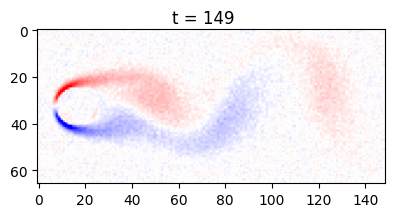

In [3]:
from moviepy.editor import *
from moviepy.video.io.bindings import mplfig_to_npimage

def make_video(X, T=10, filename="cylinder.mp4"):
    fps = int(X.shape[1] / T)

    def make_frame(ti):
        time_index = int(fps * ti)
        ax.clear()
        plt.suptitle(f"t = {np.round(t[time_index], decimals=3)}")
        ax.imshow(X[:, time_index].reshape(nx, ny, order="F").real, vmin=-10, vmax=10, cmap="bwr")
        return mplfig_to_npimage(fig)

    fig, ax = plt.subplots(1, 1, figsize=(6, 2))
    animation = VideoClip(make_frame, duration=T)
    animation.write_videofile(filename, fps=fps)

# Make the mp4 file.
make_video(X)

# Play the mp4 file.
ipython_display("cylinder.mp4")

## Lotka–Volterra System

Lotka–Volterra system data generated!
X.shape (state, time) = (2, 2501)
t.shape (time,) = (2501,)
Time Discretization: [0.0, 25.0], dt = 0.01


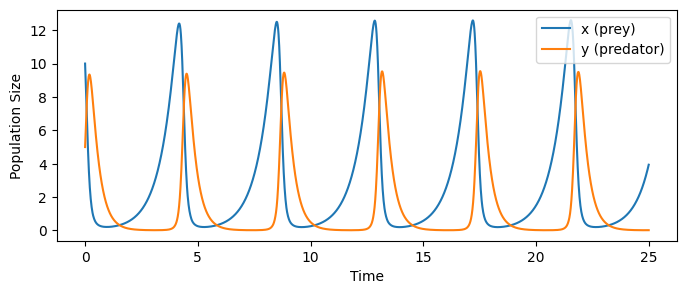

In [2]:
def generate_lv_data(t_eval, params=(1.5, 1, 3, 1), initial=(10, 5)):
    """
    Given a time vector t_eval = t1, t2, ..., the Lotka–Volterra system
    parameters params = (a, b, c, d), and the initial condition of the
    state initial = (x0, y0), evaluates and returns the coordinates of
    the Lotka–Volterra system at times t1, t2, ..., as columns of a
    data matrix X.
    """

    def lv_system(t, state, a, b, c, d):
        """
        Defines the system of differential
        equations y'(t) = f(t, y, params).
        """
        x, y = state

        # Define and return the derivatives of the state.
        x_dot = (a * x) - (b * x * y)
        y_dot = -(c * y) + (d * x * y)

        state_dot = np.array([x_dot, y_dot])

        return state_dot

    # Simulate system with solve_ivp.
    sol = solve_ivp(
        lv_system,  # differential equation system
        [t_eval[0], t_eval[-1]],  # time interval on which to simulate system
        initial,  # system initial condition
        args=params,  # system parameters
        t_eval=t_eval,  # times at which to simulate system
    )

    return sol.y

# Generate chaotic Lorenz System data.
dt = 0.01
t = np.arange(0, 25 + dt, dt)
X = generate_lv_data(t)

print("Lotka–Volterra system data generated!")
print(f"X.shape (state, time) = {X.shape}")
print(f"t.shape (time,) = {t.shape}")
print(f"Time Discretization: [{t[0]}, {t[-1]}], dt = {np.round(dt, decimals=3)}")

# Plot the time-series data.
plt.figure(figsize=(8, 3))
plt.plot(t, X[0], label="x (prey)")
plt.plot(t, X[1], label="y (predator)")
plt.ylabel("Population Size")
plt.xlabel("Time")
plt.legend(loc="upper right")
plt.show()

# Save the data.
np.save("X_lv", X)
np.save("t_lv", t)

## Lorenz System

Lorenz system data generated!
X.shape (state, time) = (3, 5000)
t.shape (time,) = (5000,)
Time Discretization: [0.0, 9.998], dt = 0.002


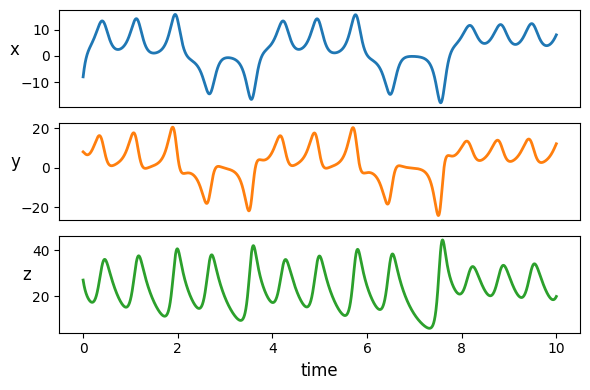

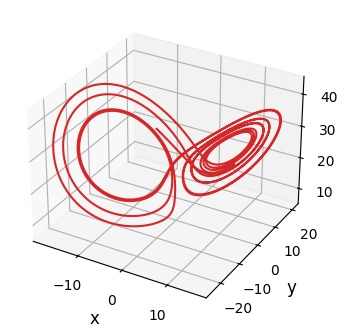

In [3]:
def generate_lorenz_data(t_eval, params=(10, 28, 8/3), initial=(-8, 8, 27)):
    """
    Given a time vector t_eval = t1, t2, ..., the Lorenz system parameters
    params = (sigma, rho, beta), and the initial condition of the state
    initial = (x0, y0, z0), evaluates and returns the coordinates of the
    Lorenz system at times t1, t2, ..., as columns of a data matrix X.
    """

    def lorenz_system(t, state, sigma, rho, beta):
        """
        Defines the system of differential
        equations y'(t) = f(t, y, params).
        """
        x, y, z = state

        # Define and return the derivatives of the state.
        x_dot = sigma * (y - x)
        y_dot = (x * (rho - z)) - y
        z_dot = (x * y) - (beta * z)

        state_dot = np.array([x_dot, y_dot, z_dot])

        return state_dot

    # Set integrator keywords to replicate the odeint defaults.
    integrator_keywords = {}
    integrator_keywords["rtol"] = 1e-12
    integrator_keywords["atol"] = 1e-12
    integrator_keywords["method"] = "LSODA"

    # Simulate system with solve_ivp.
    sol = solve_ivp(
        lorenz_system,  # differential equation system
        [t_eval[0], t_eval[-1]],  # time interval on which to simulate system
        initial,  # system initial condition
        args=params,  # system parameters
        t_eval=t_eval,  # times at which to simulate system
        **integrator_keywords,  # solve_ivp solver parameters
    )

    return sol.y

# Generate chaotic Lorenz System data.
dt = 0.002
t = np.arange(0, 10, dt)
X = generate_lorenz_data(t)

print("Lorenz system data generated!")
print(f"X.shape (state, time) = {X.shape}")
print(f"t.shape (time,) = {t.shape}")
print(f"Time Discretization: [{t[0]}, {t[-1]}], dt = {np.round(dt, decimals=3)}")

# Plot the time-series data.
plt.figure(figsize=(6, 4), dpi=100)
labels = ["x", "y", "z"]
colors = ["tab:blue", "tab:orange", "tab:green"]
# colors = [c["color"] for c in plt.rcParams["axes.prop_cycle"]]
# colors[2] = colors[3]
for i, (label, color) in enumerate(zip(labels, colors)):
    plt.subplot(3, 1, i + 1)
    plt.plot(t, X[i], c=color, lw=2)
    plt.ylabel(label, rotation=0, fontsize=12)
    if i == 2:
        plt.xlabel("time", fontsize=12)
    else:
        plt.xticks([])
plt.tight_layout()
plt.show()

# Plot the attractor.
fig = plt.figure(figsize=(12, 4), dpi=100)
ax = fig.add_subplot(projection="3d")
ax.plot(X[0], X[1], X[2], c="tab:red")
ax.set_xlabel("x", fontsize=12)
ax.set_ylabel("y", fontsize=12)
ax.set_zlabel("z", fontsize=12)
plt.show()